In [ ]:
'''
Mini-Project: Predicting Heart Disease Using Logistic Regression

1. Data Preparation:

Download the “Heart Disease UCI” dataset.
Perform exploratory data analysis (EDA) to understand the dataset.
Preprocess the data: handle missing values if any, encode categorical variables, and scale the features.

2. Model Training:

Split the dataset into a training set and a testing set.
Train a logistic regression model on the training set.

3. Model Evaluation:

Evaluate the model on the testing set using accuracy, precision, recall, and F1 score.
Use a confusion matrix to visualize the model’s performance.

'''

In [ ]:

# This is the link to the "UCI Heart Disease" dataset on the internet:
# https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data


'''
These are the columns in the dataset:
---------------------------------------
id          (Unique id for each patient)
age         (Age of the patient in years)
origin      (place of study)
sex         (Male/Female)
cp chest    pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
trestbps    resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
chol        (serum cholesterol in mg/dl)
fbs         (if fasting blood sugar > 120 mg/dl)
restecg     (resting electrocardiographic results) -- Values: [normal, stt abnormality, lv hypertrophy]
thalach     maximum heart rate achieved
exang       exercise-induced angina (True/ False)
oldpeak     ST depression induced by exercise relative to rest
slope       the slope of the peak exercise ST segment
ca          number of major vessels (0-3) colored by fluoroscopy
thal        [normal; fixed defect; reversible defect]
num         the predicted attribute

'''


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/heart_disease_uci.csv')

print(df.head())

# Display the summary of the dataset
print(df.info())

# we don't need the 'id' column because it's not a feature
del df['id']

# the 'num' column is actualy the 'Heart disease' indicator
df.rename(columns={'num': 'Heart disease'}, inplace=True)

# Check for missing values
print(df.isnull().sum())

# we can see that there are many values missing in this dataset.
# we will need to handle these missing values

# let's use lambda a little bit ...

# go over all the columns and check the percentage of missing values for each column
print ((df.isnull().mean() * 100).apply(lambda x : int(x)))

# we can see there are 3 columns with high percentage of missing values
# so let's delete them
del df['slope']
del df['ca']
del df['thal']

# fill missing values with the mode (most frequent value) for each column
df = df.apply(lambda col: col.fillna(col.mode()[0]))



   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  
<class '

<ipython-input-2-4c737c63346e>:35: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.apply(lambda col: col.fillna(col.mode()[0]))


In [3]:
# get all object columns and convert them into categorical columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

# now take all category columns and apply get_dummies on them
df = pd.get_dummies(df, drop_first=True)

print(df.columns)


Index(['age', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak',
       'Heart disease', 'sex_Male', 'dataset_Hungary', 'dataset_Switzerland',
       'dataset_VA Long Beach', 'cp_atypical angina', 'cp_non-anginal',
       'cp_typical angina', 'restecg_normal', 'restecg_st-t abnormality'],
      dtype='object')


In [4]:
# the target column

target = 'Heart disease'

# change the target column from int64 to bool
# This will automatically convert 0 into False and any other number into True
df[target] = df[target].astype(bool)


In [5]:
# Scale the features

from sklearn.preprocessing import StandardScaler

# get all the numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# scale the numbers on the numerical columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df.head())


        age  trestbps      chol    fbs    thalch  exang   oldpeak  \
0  1.007386  0.730810  0.352523   True  0.462879  False  1.375873   
1  1.432034  1.534154  0.815414  False -1.197349   True  0.632376   
2  1.432034 -0.608096  0.317588  False -0.367235   True  1.654684   
3 -1.752828 -0.072534  0.500997  False  1.925460  False  2.491118   
4 -1.328180 -0.072534  0.099243  False  1.332522  False  0.539439   

   Heart disease  sex_Male  dataset_Hungary  dataset_Switzerland  \
0          False      True            False                False   
1           True      True            False                False   
2           True      True            False                False   
3          False      True            False                False   
4          False     False            False                False   

   dataset_VA Long Beach  cp_atypical angina  cp_non-anginal  \
0                  False               False           False   
1                  False               False    

In [6]:
# Split the dataset into features and target variable

X = df.drop(target, axis=1)
y = df[target]


In [7]:
# Split the dataset into a training set and a testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [8]:
# Train a logistic regression model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [10]:
# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

print("")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("")

# Classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.7898550724637681
Precision: 0.86
Recall: 0.7771084337349398
F1 Score: 0.8164556962025317

[[ 89  21]
 [ 37 129]]

              precision    recall  f1-score   support

       False       0.71      0.81      0.75       110
        True       0.86      0.78      0.82       166

    accuracy                           0.79       276
   macro avg       0.78      0.79      0.79       276
weighted avg       0.80      0.79      0.79       276



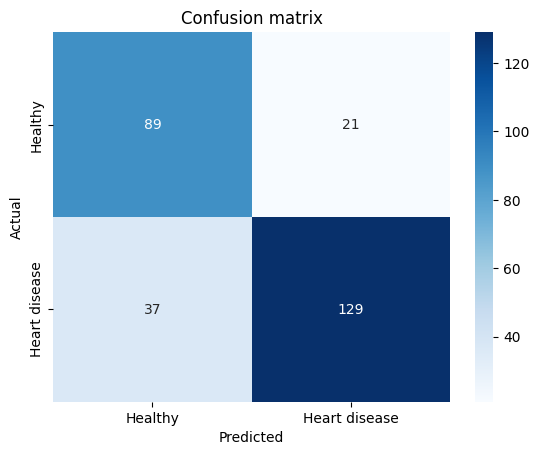

In [11]:
# Visualize the confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns

class_names = ['Healthy', 'Heart disease']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()
